In [ ]:
# init repo notebook
!git clone https://github.com/rramosp/ppdl.git > /dev/null 2> /dev/null
!mv -n ppdl/content/init.py ppdl/content/local . 2> /dev/null
!pip install -r ppdl/content/requirements.txt > /dev/null

# Discrete distributions

In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd
from rlxutils import subplots
import sys
import init
%matplotlib inline

## Discrete (or categorical) distributions

we will have a **joint** distribute distritbution of **two** variables, in the example below these are $edad$ and $barrio$. 

- each variable make take any value from a **FINITE** set. Observe that $edad$ is discrete because its value comes binned into age groups.
- the possible values for each variable might be sortable in a meaningful way or not. $edad$ is sortable, $barrio$ is not, because an alphabetical sorting does not imply any relation.
- for instance, that $edad$ `10-14` < `25-29` represents a true relation of data (younger/older people)
- but $barrio$ `Aranjuez` < `Belen` does **NOT** represent any true relation between the two neighborhoods. It is somewhat arbitrary.

recall that:
    
- the **joint probability** is the probability of a value of $edad$ and a value of $barrio$ for occurring simultaneously. Answers the question: _What is the observed proportion of people with age `10-14` **and** living in `Belen`_.
- the **marginal probability** is the probability of a value of one variable irrespective of the outcome of the another variable. Answers the question: _What is the observed proportion of people living in $belen$?_.  
- the **conditional probability** is the probability of one event occurring in the presence of a second event. Answers the question: _If we only consider people living in $belen$, what is the observed proportion of people with ages `10-14`?_

This is the data of **people ages** and **district** in Medellin where they live, taken from [medata.gov.co](http://medata.gov.co/dataset/proyecci%C3%B3n-de-poblaci%C3%B3n-medell%C3%ADn-2017)

In [2]:
x = pd.read_csv("local/data/proyecciones_de_poblacion_medellin_2017.csv.gz", delimiter=";")
x['grupo_edad'] = x.grupo_edad.str.strip().str.lower()
x = x.rename({"codigo": "barrio", "grupo_edad": "edad"}, axis=1)
x = x.replace("0-4", '00-04').replace('5-9', '05-09').replace('80 y más', '80-')
x = x[x.edad.str.lower().str.strip()!="total"]
x = x[[("Suma" not in i)&("Total" not in i) for i in x.barrio]]
x = x.groupby(["edad", "barrio" ])[['total_2017']].sum().unstack().T.loc['total_2017']

In [3]:
x

edad,00-04,05-09,10-14,15-19,20-24,25-29,30-34,35-39,40-44,45-49,50-54,55-59,60-64,65-69,70-74,75-79,80-
barrio,,,,,,,,,,,,,,,,,
Altavista,3281,3183,3538,3467,3888,3861,3270,2990,3270,2689,1896,1107,717,520,421,367,109
Aranjuez,10047,10206,10357,10976,11936,13804,13695,11557,9851,11339,12631,11616,8990,6352,4103,2551,2904
Belén,8406,9304,9695,12281,14230,15365,15848,14129,11069,13116,16739,16754,13710,10397,6893,4369,5094
Buenos Aires,6968,7288,7212,8611,10025,11343,11011,9835,8276,9630,11503,11146,8586,6071,3991,2713,3046
Castilla,7844,7986,8228,8743,10642,12446,11560,10021,9083,12129,14627,12250,9130,6665,4253,2652,2622
Doce de Octubre,12714,12562,12473,13301,14749,15935,14512,12670,11435,14508,16409,14151,10555,7568,4926,3150,3169
El Poblado,3666,4212,4527,5353,6363,8189,9540,9600,8681,10461,13356,13622,11246,8634,5739,4086,4211
Guayabal,4175,4428,4523,5268,6217,7460,7620,6692,5463,6768,8231,7821,6743,5364,3552,2546,2526
La América,2439,2883,3034,4091,4923,6154,6775,6377,5143,6418,9502,10146,8779,7678,5315,3393,3868


### joint distribution

we turn it into a **joint distribution**. This is an **empirical** distribution, because the data was obtained by counting using some method  on the real world and not derived or assumed by some analytical procedure or calculation.

In [4]:
xd = x/x.values.sum()
xd

edad,00-04,05-09,10-14,15-19,20-24,25-29,30-34,35-39,40-44,45-49,50-54,55-59,60-64,65-69,70-74,75-79,80-
barrio,,,,,,,,,,,,,,,,,
Altavista,0.001308,0.001269,0.001410,0.001382,0.001550,0.001539,0.001304,0.001192,0.001304,0.001072,0.000756,0.000441,0.000286,0.000207,0.000168,0.000146,0.000043
Aranjuez,0.004005,0.004069,0.004129,0.004376,0.004758,0.005503,0.005460,0.004607,0.003927,0.004520,0.005035,0.004631,0.003584,0.002532,0.001636,0.001017,0.001158
Belén,0.003351,0.003709,0.003865,0.004896,0.005673,0.006125,0.006318,0.005633,0.004413,0.005229,0.006673,0.006679,0.005466,0.004145,0.002748,0.001742,0.002031
Buenos Aires,0.002778,0.002905,0.002875,0.003433,0.003996,0.004522,0.004390,0.003921,0.003299,0.003839,0.004586,0.004443,0.003423,0.002420,0.001591,0.001082,0.001214
Castilla,0.003127,0.003184,0.003280,0.003485,0.004242,0.004962,0.004608,0.003995,0.003621,0.004835,0.005831,0.004883,0.003640,0.002657,0.001695,0.001057,0.001045
Doce de Octubre,0.005068,0.005008,0.004972,0.005302,0.005880,0.006353,0.005785,0.005051,0.004559,0.005784,0.006541,0.005641,0.004208,0.003017,0.001964,0.001256,0.001263
El Poblado,0.001461,0.001679,0.001805,0.002134,0.002537,0.003265,0.003803,0.003827,0.003461,0.004170,0.005324,0.005430,0.004483,0.003442,0.002288,0.001629,0.001679
Guayabal,0.001664,0.001765,0.001803,0.002100,0.002478,0.002974,0.003038,0.002668,0.002178,0.002698,0.003281,0.003118,0.002688,0.002138,0.001416,0.001015,0.001007
La América,0.000972,0.001149,0.001210,0.001631,0.001963,0.002453,0.002701,0.002542,0.002050,0.002559,0.003788,0.004045,0.003500,0.003061,0.002119,0.001353,0.001542


In [5]:
# it must add up to 1
xd.values.sum()

1.0

### marginal distribution

This are the **TWO** marginal distributions, for each one of the variables

In [6]:
dbarrio = xd.sum(axis=1)
dedad   = xd.sum(axis=0)

In [7]:
dbarrio.sum(), dedad.sum()

(1.0, 1.0)

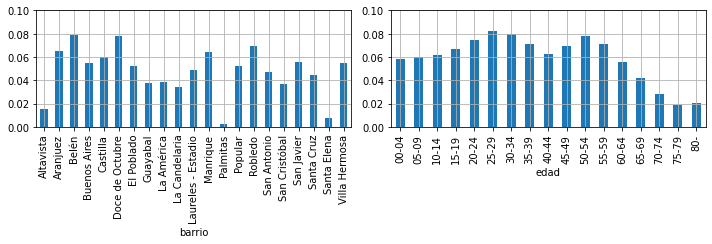

In [8]:
for ax,i in subplots(2, usizex=5, usizey=3.5):
    if i==0: dbarrio.plot(kind="bar")
    if i==1: dedad.plot(kind="bar")
    plt.grid()
    plt.ylim(0,0.1)
plt.tight_layout()
        

### conditional distribution

we compute it for one variable **with respect** to a specific value of the other one.

This is 

$$P(\text{edad}|\text{barrio}=\text{belen})$$

observe that we obtain it from the join distribution but **WE MUST NORMALIZE** so we have a true distribution adding up to 1.

This normalization will become very important later on in the course.

In [9]:
# unnormalized conditional

xd.loc['Belén']

edad
00-04    0.003351
05-09    0.003709
10-14    0.003865
15-19    0.004896
20-24    0.005673
25-29    0.006125
30-34    0.006318
35-39    0.005633
40-44    0.004413
45-49    0.005229
50-54    0.006673
55-59    0.006679
60-64    0.005466
65-69    0.004145
70-74    0.002748
75-79    0.001742
80-      0.002031
Name: Belén, dtype: float64

In [11]:
# it does not add up to one
xd.loc['Belén'].sum()

0.07869355283657012

In [12]:
# we normalized it

dbelen = xd.loc['Belén'] / xd.loc['Belén'].sum()
print ("check sum =", dbelen.sum())
dbelen

check sum = 1.0


edad
00-04    0.042584
05-09    0.047133
10-14    0.049114
15-19    0.062214
20-24    0.072087
25-29    0.077837
30-34    0.080284
35-39    0.071576
40-44    0.056074
45-49    0.066444
50-54    0.084798
55-59    0.084874
60-64    0.069453
65-69    0.052670
70-74    0.034919
75-79    0.022133
80-      0.025806
Name: Belén, dtype: float64

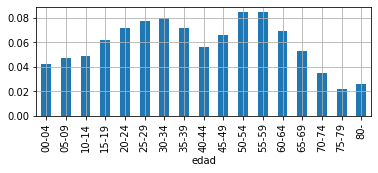

In [13]:
dbelen.plot(kind='bar', figsize=(6,2))
plt.grid();

Sometimes we write 

$$P(\text{edad}|\text{barrio})$$

without specifying the value of the conditioning variable, but **assuming** someone has decided upon a certain value. You must pay attention to the context in which this is being used to understand well how to compute or use this conditional distribution.

In fact, for each value of $barrio$ we have a different distritbuion.

### independance

Observe **carefully**. If all conditional distributions look the same this suggests that both variables **are independant**, $\rightarrow$ knowing something about one does not tell us anything about the other one.

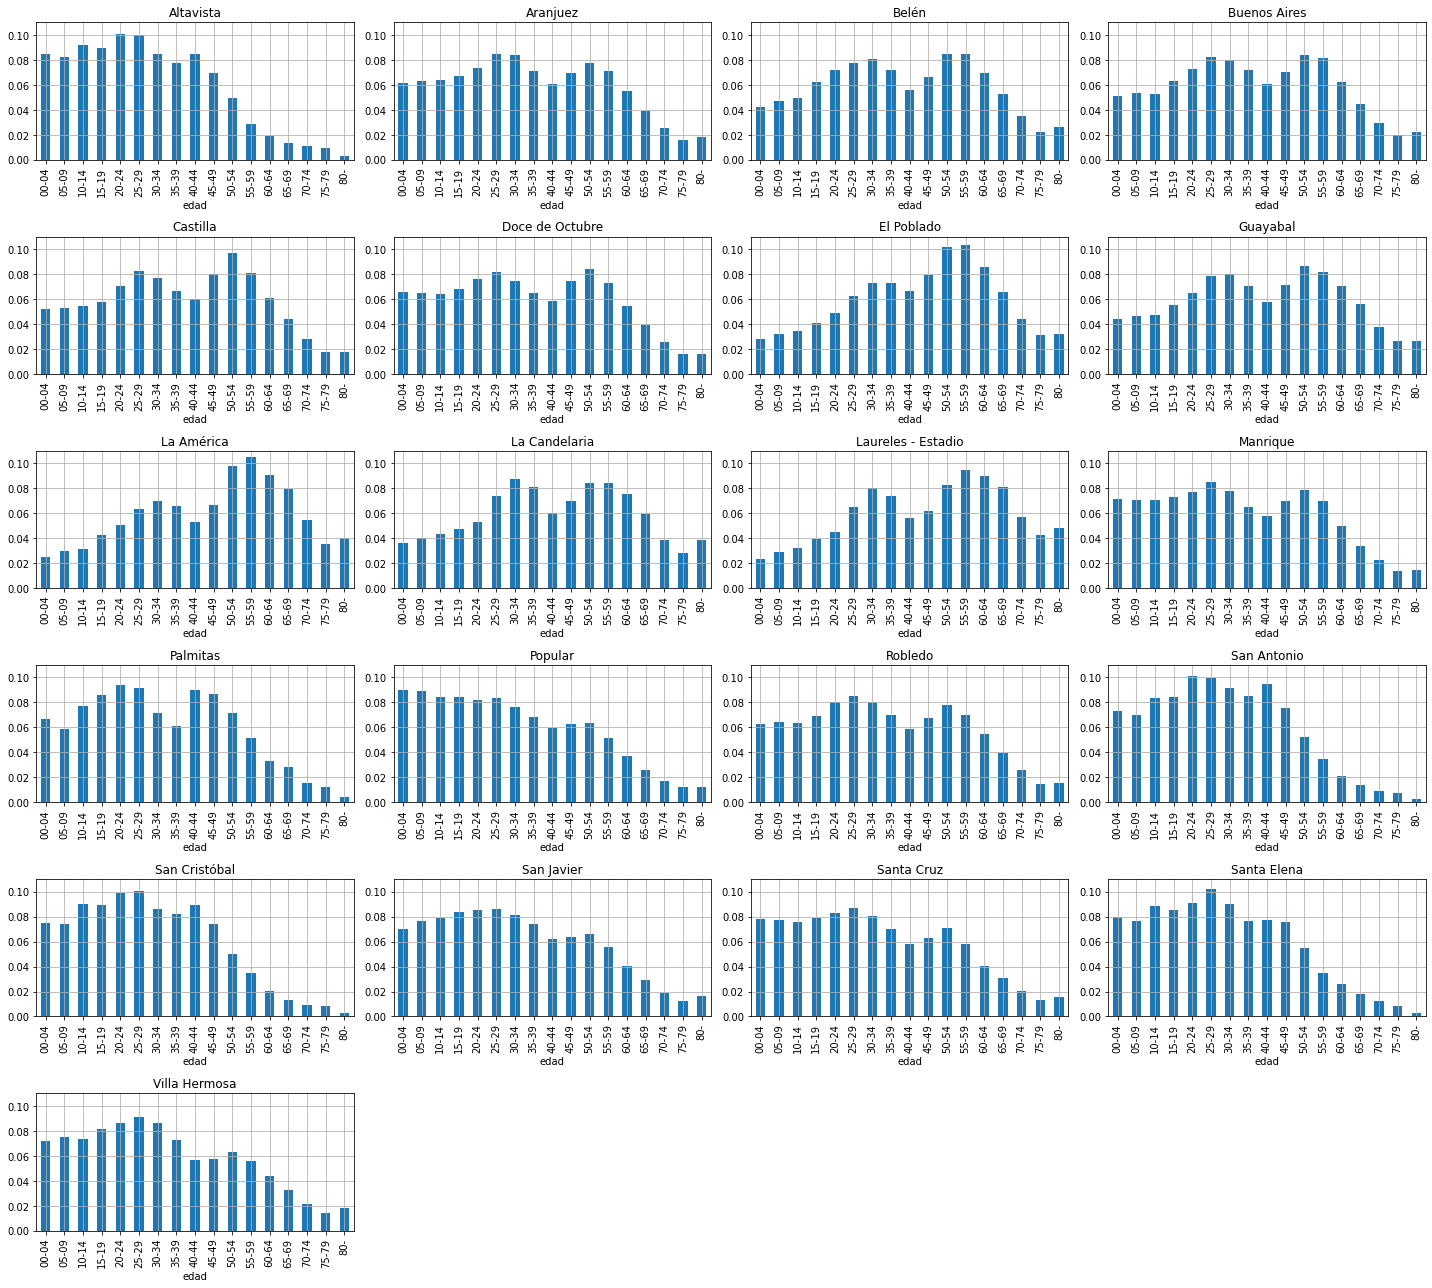

In [147]:

for ax,barrio in subplots(xd.index, usizex=5, usizey=3, n_cols=4):
    dmarginal = xd.loc[barrio] / xd.loc[barrio].sum()
    dmarginal.plot(kind='bar', ax=ax)
    plt.title(barrio)
    plt.ylim(0,.11)
    plt.grid();
plt.tight_layout()

or for each value of $edad$

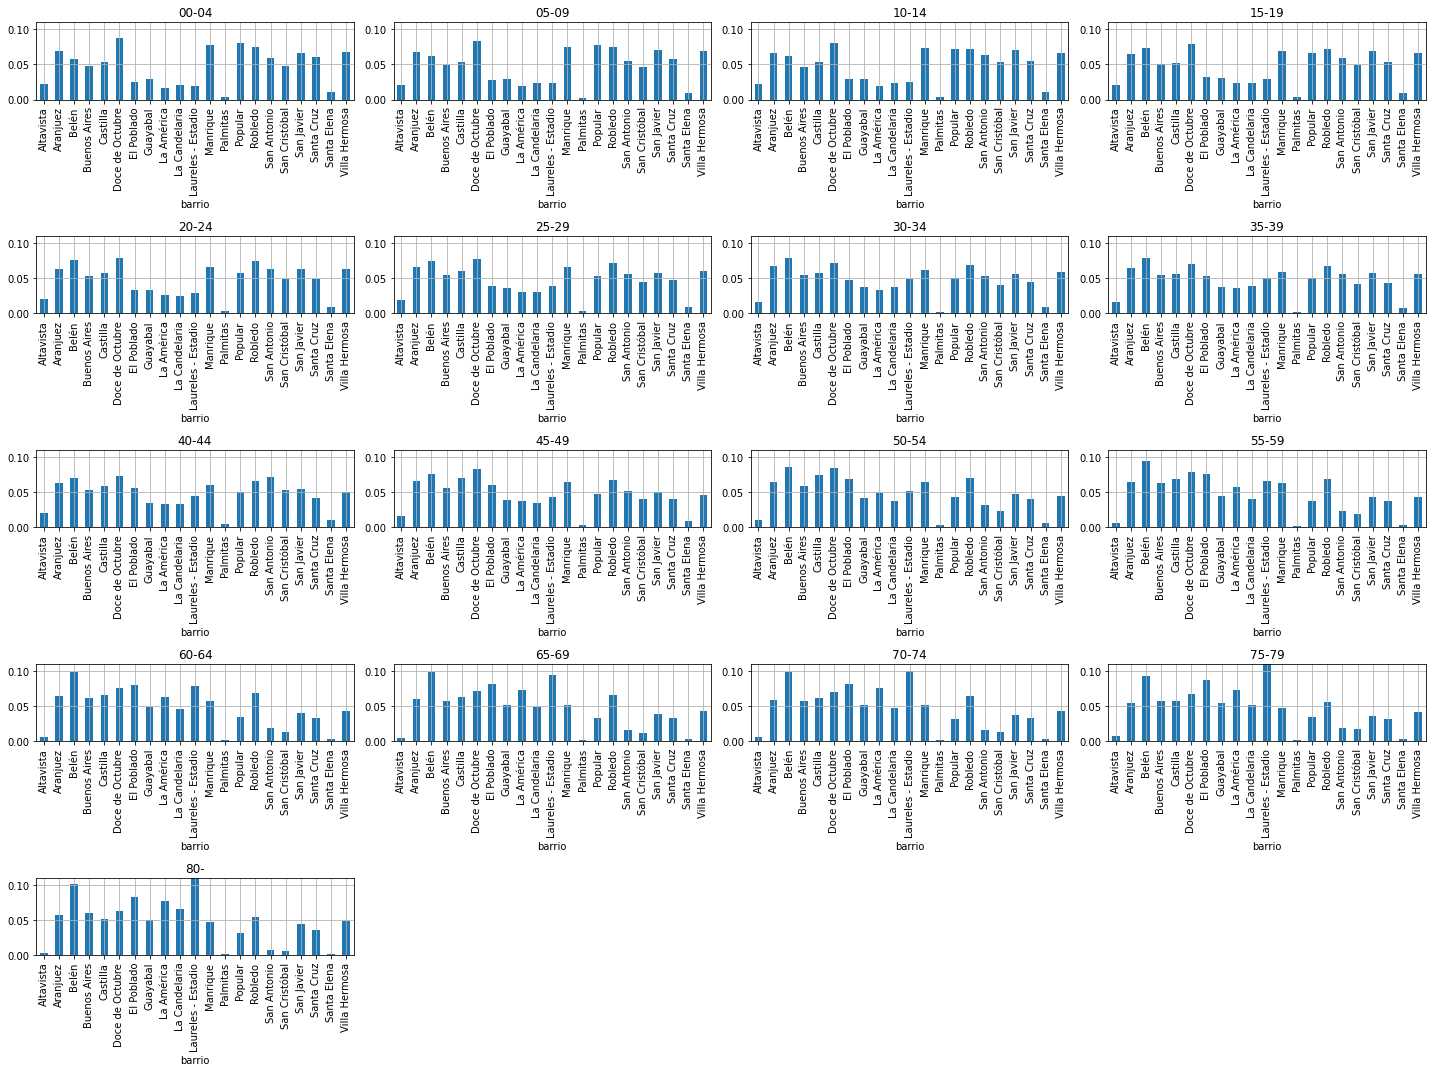

In [167]:
for ax,edad in subplots(xd.columns, usizex=5, usizey=3, n_cols=4):
    dmarginal = xd[edad] / xd[edad].sum()
    dmarginal.plot(kind='bar', ax=ax)
    plt.title(edad)
    plt.ylim(0,.11)
    plt.grid();
plt.tight_layout()